In [41]:
!pip install scanpy anndata matplotlib seaborn numpy bbknn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552449 sha256=e1a56b7402517d9799e5e9a8f3445010793b0b85a5ed1ae44ce3151432258841
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


In [5]:
import scanpy as sc
import anndata
import matplotlib.pyplot as plt
import seaborn as sns


Source of Data : https://figshare.com/search?q=pancreas

In [8]:
adata = sc.read_h5ad('/content/pancreas_scib.h5ad')

### Dimensions:
`n_obs × n_vars = 16382 × 19093`:

- **n_obs (observations)**: This represents the number of cells in your dataset, which is 16,382 cells.
- **n_vars (variables)**: This represents the number of genes measured across all cells, which is 19,093 genes.

In genomics, when we say there are 16,382 cells and 19,093 genes, it means that we have data on the expression levels of 19,093 genes across 16,382 individual cells. Each cell's gene expression profile is represented by a vector of length 19,093, where each element of the vector corresponds to the expression level of a specific gene within that cell.

So, in this context, each cell is characterized by the expression levels of all 19,093 genes, but it doesn't mean that each cell possesses all 19,093 genes. Instead, the data describes the gene expression profiles of different cells, each of which may express a subset of the total number of genes.

---

### Annotations:
**obs (observations/cell metadata)**: This section lists the metadata associated with each cell. In this case, you have the following metadata columns:

- **'tech'**: This denotes the technology or platform used for sequencing.
- **'celltype'**: This represents the cell type annotations.
- **'size_factors'**: This  scaling factors used for normalization.





In [9]:
print(adata)


AnnData object with n_obs × n_vars = 16382 × 19093
    obs: 'tech', 'celltype', 'size_factors', 'batch'
    layers: 'counts'


In [10]:
print(adata.obs.head())


              tech celltype  size_factors   batch
D101_5      celseq    gamma      0.028492  celseq
D101_43     celseq    gamma      0.079348  celseq
D101_93     celseq    gamma      0.037932  celseq
D102_4      celseq    gamma      0.047685  celseq
D172444_23  celseq    gamma      0.038683  celseq


In [12]:
print(adata.var)


Empty DataFrame
Columns: []
Index: [A1BG, A1CF, A2M, A2ML1, A4GALT, A4GNT, AA06, AAAS, AACS, AACSP1, AADAC, AADACL2, AADACL3, AADAT, AAED1, AAGAB, AAK1, AAMDC, AAMP, AANAT, AAR2, AARD, AARS, AARS2, AARSD1, AASDH, AASDHPPT, AASS, AATF, AATK, ABAT, ABCA1, ABCA10, ABCA11P, ABCA12, ABCA13, ABCA17P, ABCA2, ABCA3, ABCA4, ABCA5, ABCA6, ABCA7, ABCA8, ABCA9, ABCB1, ABCB10, ABCB11, ABCB4, ABCB5, ABCB6, ABCB7, ABCB8, ABCB9, ABCC1, ABCC10, ABCC11, ABCC12, ABCC13, ABCC2, ABCC3, ABCC4, ABCC5, ABCC6, ABCC6P1, ABCC6P2, ABCC8, ABCC9, ABCD1, ABCD2, ABCD3, ABCD4, ABCE1, ABCF1, ABCF2, ABCF3, ABCG1, ABCG2, ABCG4, ABCG5, ABCG8, ABHD1, ABHD10, ABHD11, ABHD12, ABHD12B, ABHD13, ABHD14A, ABHD14B, ABHD15, ABHD16A, ABHD16B, ABHD17A, ABHD17B, ABHD17C, ABHD2, ABHD3, ABHD4, ABHD5, ABHD6, ...]

[19093 rows x 0 columns]


In [13]:
print(adata.X)


[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.6120808  0.         0.         ... 0.         2.6120806  0.        ]
 [0.         3.311074   0.         ... 0.         0.         0.        ]
 ...
 [0.42996258 2.6206095  0.         ... 2.1124895  1.0953737  1.0403827 ]
 [3.4695568  0.64595073 0.         ... 0.         0.         0.        ]
 [0.4566651  0.5159923  0.         ... 0.         0.53929645 0.        ]]


In the context of an `AnnData` object in scanpy, `adata.X` represents the main data matrix containing the expression values of genes across cells.

- Each row of `adata.X` represents a cell.
- Each column represents a gene.
- The values in the matrix represent the expression level of each gene in each cell, often measured as counts (e.g., read counts or unique molecular identifiers).

Accessing `adata.X` allows you to retrieve the raw expression data, which serves as the foundation for various analyses and visualizations in single-cell RNA sequencing (scRNA-seq) studies, such as clustering, differential expression analysis, and trajectory inference.


In [14]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)


In [15]:
sc.pp.highly_variable_genes(adata)


In [16]:
sc.pp.scale(adata, max_value=10)


In [17]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)


         Falling back to preprocessing with `sc.pp.pca` and default params.


Distribution of Cell Types

celltype
alpha                 5493
beta                  4169
ductal                2142
acinar                1669
delta                 1055
gamma                  699
activated_stellate     464
endothelial            313
quiescent_stellate     193
macrophage              79
mast                    42
epsilon                 32
schwann                 25
t_cell                   7
Name: count, dtype: int64


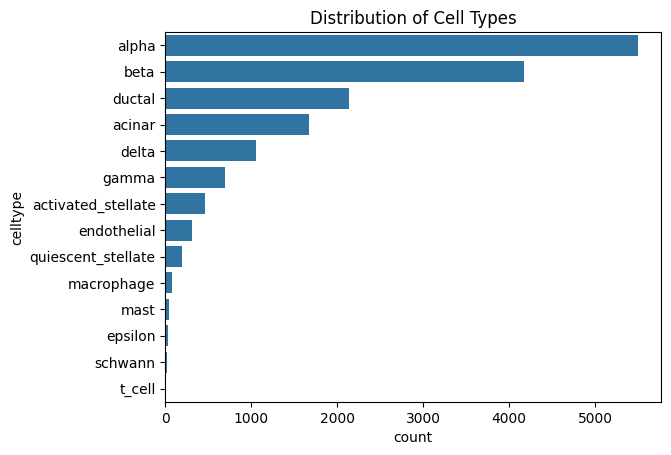

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for cell types
celltype_counts = adata.obs['celltype'].value_counts()
print(celltype_counts)
sns.countplot(y=adata.obs['celltype'], order=celltype_counts.index)
plt.title('Distribution of Cell Types')
plt.show()


Distribution of Size Factors

count    16382.000000
mean         1.000000
std          2.648312
min          0.006681
25%          0.026050
50%          0.048008
75%          0.820749
max         39.738821
Name: size_factors, dtype: float64


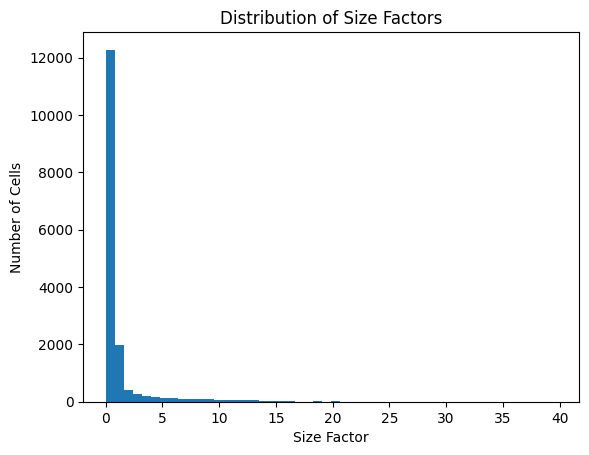

In [20]:
# Summary statistics for size factors
print(adata.obs['size_factors'].describe())

# Histogram for size factors
plt.hist(adata.obs['size_factors'], bins=50)
plt.title('Distribution of Size Factors')
plt.xlabel('Size Factor')
plt.ylabel('Number of Cells')
plt.show()


Distribution of Batches

batch
indrop        8569
smartseq2     2394
celseq2       2285
smarter       1492
celseq        1004
fluidigmc1     638
Name: count, dtype: int64


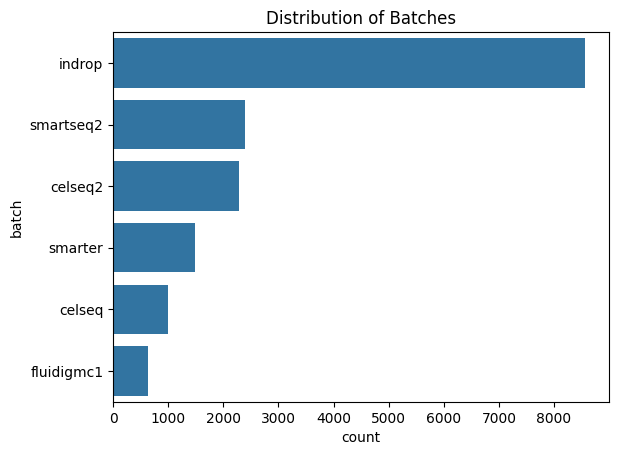

In [21]:
# Count plot for batches
batch_counts = adata.obs['batch'].value_counts()
print(batch_counts)
sns.countplot(y=adata.obs['batch'], order=batch_counts.index)
plt.title('Distribution of Batches')
plt.show()


Distribution of Counts per Gene

count    1.909300e+04
mean     1.395221e+05
std      2.962756e+06
min      0.000000e+00
25%      1.882494e+03
50%      2.608668e+04
75%      9.146550e+04
max      3.792533e+08
dtype: float64


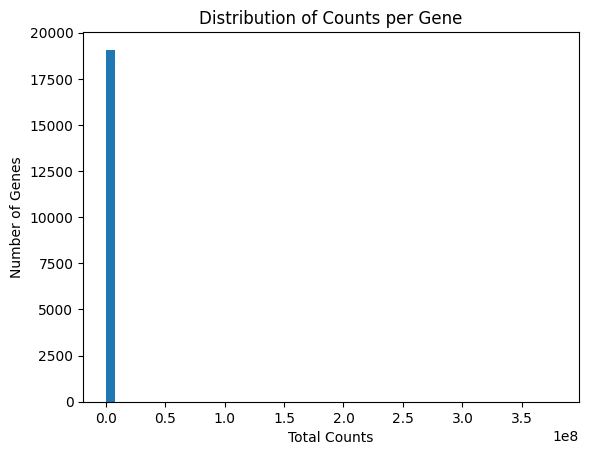

In [28]:
import numpy as np
import pandas as pd

# Access counts layer
counts = adata.layers['counts']

# Summarize counts per gene
gene_counts = np.sum(counts, axis=0)  # .A1 converts sparse matrix to 1D array if necessary
print(pd.Series(gene_counts).describe())

plt.hist(gene_counts, bins=50)
plt.title('Distribution of Counts per Gene')
plt.xlabel('Total Counts')
plt.ylabel('Number of Genes')
plt.show()


Distribution of Counts per Cell

count    1.638200e+04
mean     1.626118e+05
std      3.638252e+05
min      1.185000e+03
25%      4.741087e+03
50%      8.548925e+03
75%      1.123730e+05
max      5.068353e+06
dtype: float64


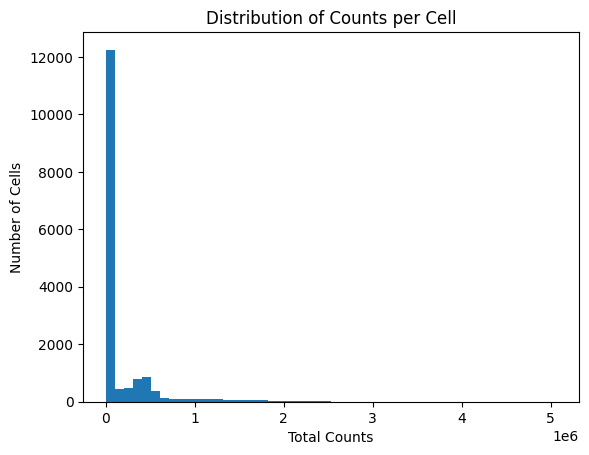

In [52]:
# Summarize counts per cell

cell_counts = np.sum(counts, axis=1) # .A1 converts sparse matrix to 1D array if necessary
print(pd.Series(cell_counts).describe())

plt.hist(cell_counts, bins=50)
plt.title('Distribution of Counts per Cell')
plt.xlabel('Total Counts')
plt.ylabel('Number of Cells')
plt.show()


### **How it can be used for a) cell classification b) gene classification & Medical uses after knowing the cell/gene types**

### 1. Cell Classification

#### Important Columns for Cell Classification:
- **celltype**: The type of cell (e.g., alpha, beta, ductal).
- **tech**: The technology used, which might influence classification.
- **batch**: Batch information, useful for correcting batch effects in classification.

#### How It Can Be Used:
- **Machine Learning Models**: Use the `celltype` column as labels in supervised learning algorithms to classify cells based on their gene expression profiles.
- **Clustering**: Unsupervised clustering methods (e.g., k-means, Louvain algorithm) can group similar cells together, potentially identifying new or rare cell types.
- **Marker Genes Identification**: Identify genes that are specifically expressed in certain cell types (cell-type-specific markers).

### 2. Gene Classification

#### Important Columns for Gene Classification:
- **layers['counts']**: Contains the raw counts of gene expression, essential for understanding the activity of each gene.
- **size_factors**: Normalization factors to account for variations in sequencing depth.

#### How It Can Be Used:
- **Differential Expression Analysis**: Identify genes that are differentially expressed between different cell types or conditions.
- **Pathway Analysis**: Determine which biological pathways are active in different cell types by looking at sets of differentially expressed genes.
- **Gene Regulatory Networks**: Construct networks to understand how genes regulate each other within and between cell types.

### 3. Medical Uses After Knowing the Cell/Gene Types

#### Disease Understanding and Treatment:

- **Disease Biomarkers**: Identification of cell-type-specific or disease-specific biomarkers for early diagnosis, prognosis, and monitoring.
- **Targeted Therapies**: Develop drugs that target specific cell types or genes. For instance, in diabetes research, targeting beta cells (insulin-producing cells) might be crucial.
- **Regenerative Medicine**: Understanding the cell types in tissues can guide stem cell therapy and tissue engineering efforts, for example, in regenerating pancreatic islets.
- **Understanding Disease Mechanisms**: Study the cellular composition and gene expression changes in diseased versus healthy tissues to uncover the underlying mechanisms of diseases like cancer, diabetes, or neurodegenerative disorders.

### Specific Examples:

#### Diabetes:
- **Alpha, Beta, Delta, Gamma, Epsilon Cells**: These are all pancreatic islet cells with different roles in insulin and glucagon secretion. Understanding their gene expression profiles can help in developing diabetes treatments.

#### Cancer:
- **Macrophages, T cells**: These immune cells can have roles in tumor microenvironments. Understanding their states and gene expression can aid in developing immunotherapies.

#### Cardiovascular Diseases:
- **Endothelial Cells**: These cells line blood vessels and play a role in cardiovascular health. Identifying genes important for endothelial function can help in developing treatments for atherosclerosis and other vascular diseases.

#### Neurodegenerative Diseases:
- **Schwann Cells**: These cells are involved in the peripheral nervous system. Understanding their gene expression can help in research on diseases like Charcot-Marie-Tooth disease or peripheral neuropathies.

### Summary:

To utilize scRNA-seq data effectively for cell and gene classification and to understand disease mechanisms, focus on key columns such as `celltype`, `layers['counts']`, and `size_factors`. This information can be used in various analyses, from machine learning to pathway analysis, ultimately aiding in the development of targeted therapies and improving our understanding of disease mechanisms.


**Data Visualization**

1. Visualize Data with PCA

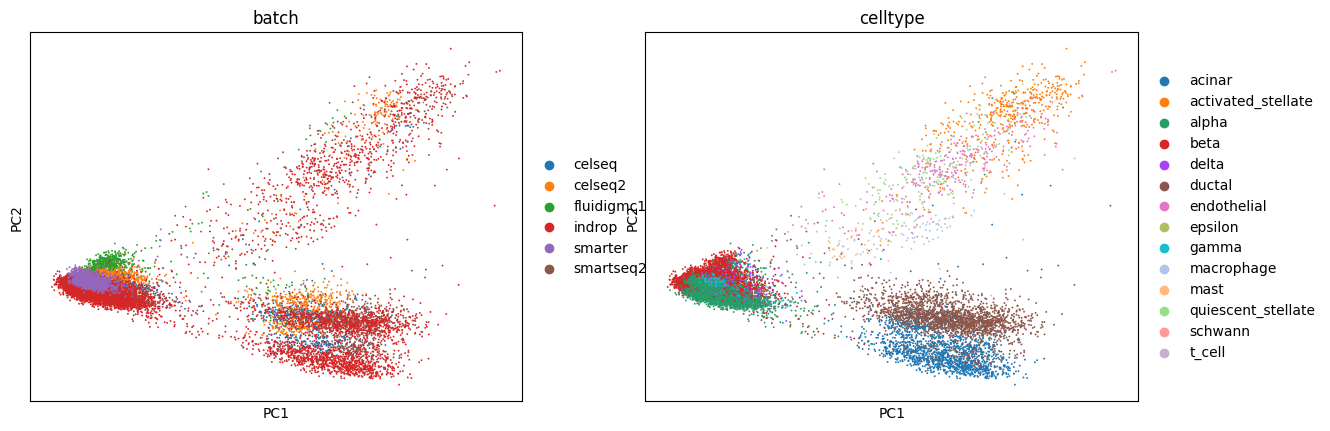

In [38]:
# PCA plot before batch correction
sc.tl.pca(adata)
sc.pl.pca(adata, color=['batch', 'celltype'])


24. Visualize Data with UMAP

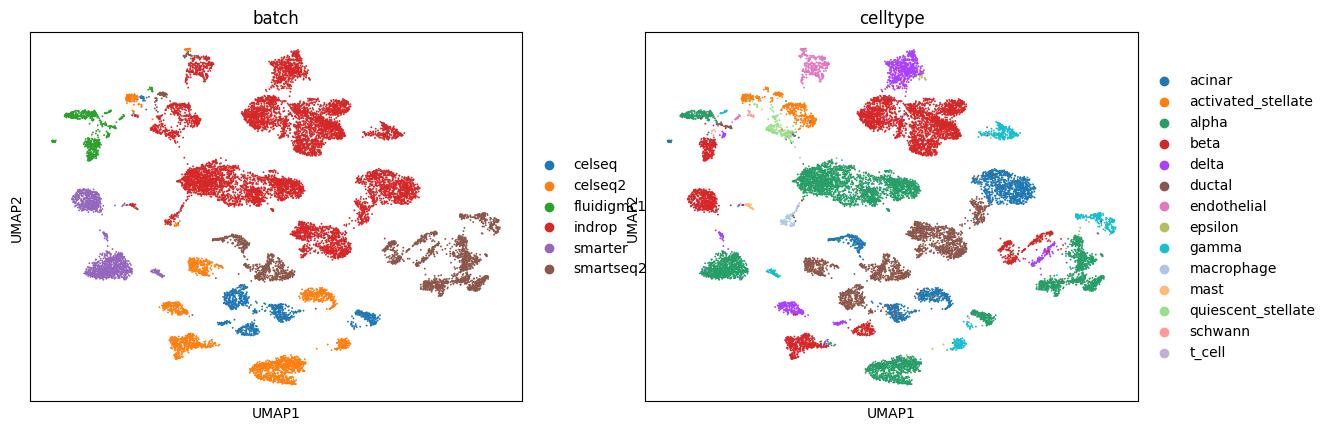

In [39]:
# UMAP plot before batch correction
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['batch', 'celltype'])


3. Correct for Batch Effects Using Scanpy's BBKNN

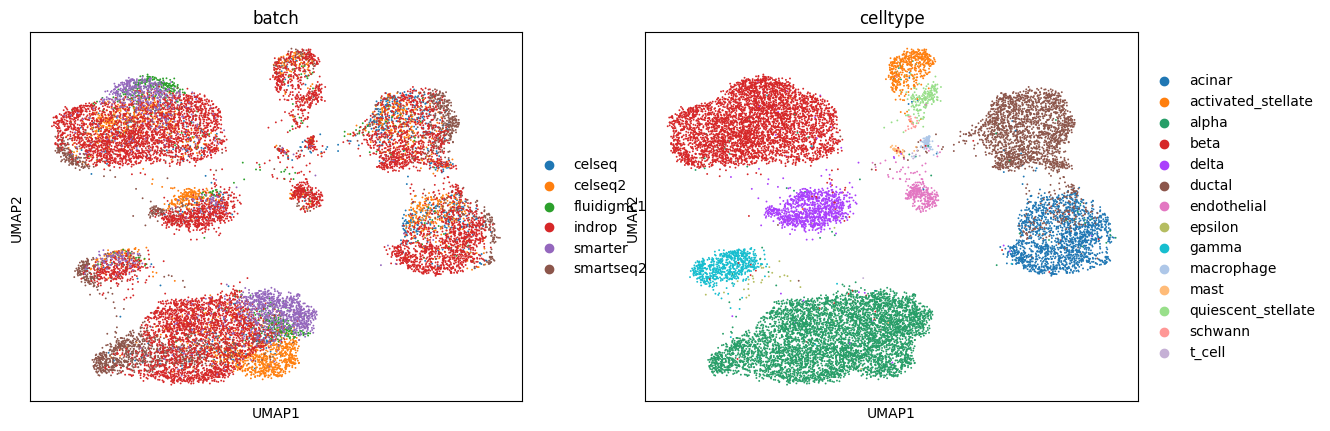

In [42]:
import scanpy.external as sce

# Correct for batch effects
sce.pp.bbknn(adata, batch_key='batch')

# UMAP plot after batch correction
sc.tl.umap(adata)
sc.pl.umap(adata, color=['batch', 'celltype'])


Loss can be use for this imbalanced data

1. **Weighted Loss Functions**:
   - **Binary Cross-Entropy with Class Weights**: Adjust the weights of different classes inversely proportional to their frequencies in the dataset. This gives more importance to minority class samples.
   - **Weighted Categorical Cross-Entropy**: Extend the concept of class weights to multi-class classification problems by assigning different weights to each class.

2. **Focal Loss**:
   - **Focal Loss**: Proposed specifically for addressing class imbalance, focal loss reduces the loss contribution of well-classified examples and focuses more on hard, misclassified examples. It down-weights easy examples (well-classified) and focuses more on the harder examples.

3. **Dice Loss**:
   - **Dice Loss**: Originally used for image segmentation tasks, Dice loss measures the overlap between predicted and ground truth masks. It is effective for imbalanced datasets as it penalizes false negatives more heavily.

4. **Jaccard Loss**:
   - **Jaccard Loss (Intersection over Union Loss)**: Similar to Dice loss, Jaccard loss also measures the similarity between predicted and ground truth masks. It is suitable for tasks where the spatial overlap between classes is essential.

5. **Kullback-Leibler Divergence**:
   - **Kullback-Leibler (KL) Divergence Loss**: Measures the difference between two probability distributions. It can be adapted for imbalanced data by penalizing deviations from the true distribution more heavily.

6. **F1 Loss**:
   - **F1 Loss**: Optimizes the F1-score directly, which is the harmonic mean of precision and recall. F1 loss can handle class imbalance by penalizing false positives and false negatives equally.

7. **Balanced Loss Functions**:
   - **Balanced Cross-Entropy Loss**: Attempts to balance the contributions of different classes in the loss function, effectively addressing class imbalance.

When selecting a loss function for imbalanced data, it's essential to consider the specific characteristics of your dataset and the task at hand. Experimentation and validation on a holdout dataset are crucial to determine the most effective loss function for your particular scenario.
